# 04 Regression model 

> k-fold cross validation of regression model choice   

In [1]:
#|default_exp core.04_regression_model

In [2]:
#|export
import dementia_inequalities as proj
from dementia_inequalities import const, log, utils, tools
import adu_proj.utils as adutils

In [3]:
#|export
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import KFold, cross_val_score
import itertools

/var/folders/4n/x6w1yfcx01qbymrsfpz4ybq00000gn/T/ipykernel_2928/1908235626.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---

In [4]:
df_dem_plus = pd.read_csv(const.output_path+'/df_dem_plus.csv')

df_dem_plus.head()

,area_code,area_name,pop,DEM_afflicted,HYP_afflicted,DM_afflicted,STIA_afflicted,ALevel_plus,Female_all,Male_all,...,Male_over_65,over_65,white_pc,DEM_afflicted_pc,ALevel_plus_pc,over_65_pc,female_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc
0,E07000091,New Forest,151481,1858.546949,28892.139020,9338.695410,4466.648271,72749.0,91513.3596,84729.6073,...,23644.9796,51920.6826,0.932,0.012269,0.480252,0.342754,0.604124,0.190731,0.061649,0.029487
1,E09000027,Richmond upon Thames,156795,1016.262785,16263.714161,5723.913130,2019.443594,112919.0,101226.6730,93918.3682,...,14170.0187,31637.7606,0.630,0.006481,0.720170,0.201778,0.645599,0.103726,0.036506,0.012880
2,E07000116,Tunbridge Wells,95022,876.255260,12908.434533,4606.674451,1889.024705,52395.0,59540.1412,56126.1458,...,10171.4566,22570.0090,0.842,0.009222,0.551399,0.237524,0.626593,0.135847,0.048480,0.019880
3,E07000121,Lancaster,123214,1228.376774,16806.421220,6784.714317,2647.583108,65724.0,72615.6480,69496.5141,...,13527.6316,29465.7648,0.878,0.009969,0.533413,0.239143,0.589346,0.136400,0.055064,0.021488
4,E07000042,Mid Devon,67987,547.793487,10854.465333,4281.878984,1530.207441,33190.0,42541.3752,40639.6312,...,9396.6343,20046.6806,0.938,0.008057,0.488182,0.294860,0.625728,0.159655,0.062981,0.022507


In [5]:
# # potential covariates 
# covar_opt = ['over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc']

In [6]:
# X_data = df_dem_plus[['ALevel_plus_pc', 'white_pc', 'over_65_pc', 'female_pc']].values.reshape(-1,4)
# Y_data = df_dem_plus['DEM_afflicted_pc'].values.reshape(-1,1)

In [7]:
# # Parameters for cross validation 
# n_folds = 5
# cv_kfold = KFold(n_folds, random_state=13, shuffle=True)

# # Model 
# model = linear_model.LinearRegression()

# # evaluate the model using 5-fold CV 
# scores = cross_val_score(model, X=X_data, y=Y_data, cv=cv_kfold)

# print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [8]:
# Potential covariates 
covar_opt = ['over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc']

# Outcome data 
Y_data = df_dem_plus['DEM_afflicted_pc'].values.reshape(-1,1)

# Parameters for cross validation 
n_folds = 5
cv_kfold = KFold(n_folds, random_state=13, shuffle=True)

# Model 
model = linear_model.LinearRegression()

covar_comb = {}
perform_by_covar = {}

key_num = 0
for i in range(1,8):
    for j, subset in enumerate(itertools.combinations(covar_opt, i)):
        covar_comb[key_num] = subset
        #print(subset)
        X_data = df_dem_plus[list(subset)].values.reshape(-1,i)
        # evaluate the model using 5-fold CV 
        scores = cross_val_score(model, X=X_data, y=Y_data, cv=cv_kfold)
        perform_by_covar[key_num] = np.mean(scores)
        key_num += 1
        #print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [9]:
# Best combination of covariates
covar_comb[max(perform_by_covar, key=perform_by_covar.get)]

('over_65_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc')

In [10]:
# Top 5 combination of covariates 
max_5 = sorted(perform_by_covar, key=perform_by_covar.get, reverse=True)[:5]
[f'Covariates:{covar_comb[x]}, Accuracy:{perform_by_covar[x]}' for x in max_5]

["Covariates:('over_65_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.7674882777954846",
 "Covariates:('over_65_pc', 'ALevel_plus_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.7667498581680416",
 "Covariates:('over_65_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.7667010442466264",
 "Covariates:('over_65_pc', 'HYP_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.7664719739876983",
 "Covariates:('over_65_pc', 'white_pc', 'HYP_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.7664142681554167"]

In [11]:
# Create dataframe of combinations of covariates
df_covar_comb = pd.DataFrame.from_dict(covar_comb, orient='index')
df_covar_comb.columns = ['covariate 1', 'covariate 2', 'covariate 3', 'covariate 4', 'covariate 5', 'covariate 6', 'covariate 7']

# Create dataframe of accuracy
df_accuracy = pd.DataFrame.from_dict(perform_by_covar, orient='index')
df_accuracy.rename(columns={0:'accuracy (mean)'}, inplace=True)

# Merge 
df_model_acc = pd.merge(df_accuracy, df_covar_comb, left_index=True, right_index=True)

In [12]:
df_model_acc

,accuracy (mean),covariate 1,covariate 2,covariate 3,covariate 4,covariate 5,covariate 6,covariate 7
0,0.739684,over_65_pc,None,None,None,None,None,None
1,-0.003884,female_pc,None,None,None,None,None,None
2,0.110213,ALevel_plus_pc,None,None,None,None,None,None
3,0.552557,white_pc,None,None,None,None,None,None
4,0.641614,HYP_afflicted_pc,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...
122,0.763680,over_65_pc,female_pc,ALevel_plus_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,None
123,0.763539,over_65_pc,female_pc,white_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,None
124,0.765706,over_65_pc,ALevel_plus_pc,white_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,None
125,0.744675,female_pc,ALevel_plus_pc,white_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,None


How do we understand these residuals? Might be a good idea to look at the areas which we would expect to have high rates of diagnosis - for example if we look at top 50 areas accoridng to the IMD (or ADI). 

In [13]:
df_IMD = pd.read_excel(const.data_path+'/IoD2019_Local_Authority_District_Summaries__lower-tier__.xlsx', sheet_name='IMD')

In [14]:
# the 50 least deprived LADs according to the IMD
df_IMD[df_IMD['IMD - Rank of average rank ']>317-50]

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,IMD 2019 - Local concentration,IMD 2019 - Rank of local concentration
13,E06000014,York,9092.16,275,11.727,267,0.0083,187,0.0540,192,26241.63,193
16,E06000017,Rutland,6306.80,303,8.381,303,0.0000,195,0.0000,295,15263.23,313
21,E06000022,Bath and North East Somerset,9260.09,274,11.745,265,0.0174,169,0.0402,208,25201.75,217
33,E06000036,Bracknell Forest,8295.79,284,10.241,286,0.0000,195,0.0025,283,19756.83,289
34,E06000037,West Berkshire,7974.34,289,9.952,289,0.0000,195,0.0077,272,19124.68,297
37,E06000040,Windsor and Maidenhead,6289.30,304,8.376,304,0.0000,195,0.0005,294,19673.48,291
38,E06000041,Wokingham,3651.54,316,5.846,316,0.0000,195,0.0000,295,15956.85,311
56,E07000004,Aylesbury Vale,9001.26,277,11.183,276,0.0000,195,0.0147,256,23585.25,245
57,E07000005,Chiltern,4992.13,315,6.952,315,0.0000,195,0.0000,295,16398.09,307
58,E07000006,South Bucks,7643.53,292,9.481,294,0.0000,195,0.0000,295,16225.23,310


In [15]:
least_50_IMD = list(df_IMD[df_IMD['IMD - Rank of average rank ']>317-60]['Local Authority District name (2019)'])

In [16]:
df_dem_topIMD = df_dem_plus[df_dem_plus['area_name'].isin(least_50_IMD)].copy()

In [17]:
list_45 = list(df_dem_topIMD['area_name'])
list(set(least_50_IMD).difference(list_45))

['South Northamptonshire',
 'South Bucks',
 'Wycombe',
 'Chiltern',
 'Aylesbury Vale']

2020, the former District Council areas of Aylesbury Vale, Chiltern, South Bucks and Wycombe and Buckinghamshire County Council came together to form a single Unitary Authority, Buckinghamshire Council.

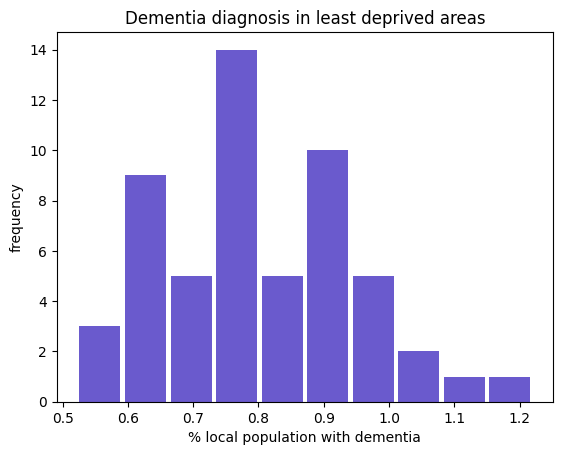

In [18]:
# dementia diagnosis in least deprived areas 
dem_diag_least_IMD = 100*df_dem_topIMD['DEM_afflicted_pc']

# histogram plot of the models residuals
plt.hist(dem_diag_least_IMD, color='slateblue', rwidth=0.9)
plt.title('Dementia diagnosis in least deprived areas')
plt.xlabel('% local population with dementia')
plt.ylabel('frequency')
plt.show()

In [19]:
# Potential covariates 
covar_opt = ['over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc']

# Outcome data 
Y_data = df_dem_topIMD['DEM_afflicted_pc'].values.reshape(-1,1)

# Parameters for cross validation 
n_folds = 2
cv_kfold = KFold(n_folds, random_state=13, shuffle=True)

# Model 
model = linear_model.LinearRegression()

covar_comb = {}
perform_by_covar = {}

key_num = 0
for i in range(1,8):
    for j, subset in enumerate(itertools.combinations(covar_opt, i)):
        covar_comb[key_num] = subset
        #print(subset)
        X_data = df_dem_topIMD[list(subset)].values.reshape(-1,i)
        model.fit(X=X_data, y=Y_data)
        scores = model.score(X=X_data, y=Y_data)
        # evaluate the model using 5-fold CV 
        #scores = cross_val_score(model, X=X_data, y=Y_data, cv=cv_kfold)
        perform_by_covar[key_num] = np.mean(scores)
        key_num += 1
        #print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [20]:
# Top 5 combination of covariates 
max_5 = sorted(perform_by_covar, key=perform_by_covar.get, reverse=True)[:5]
[f'Covariates:{covar_comb[x]}, Accuracy:{perform_by_covar[x]}' for x in max_5]

["Covariates:('over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.5483049320170064",
 "Covariates:('over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.5470352621819567",
 "Covariates:('over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.5463040349426899",
 "Covariates:('over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'STIA_afflicted_pc'), Accuracy:0.54607617552517",
 "Covariates:('over_65_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc'), Accuracy:0.5433163711792113"]

In [21]:
# Alternative linear regression using sklearn 

x_all_covar = df_dem_topIMD[['over_65_pc', 'female_pc', 'ALevel_plus_pc']].values.reshape(-1,3)
y = df_dem_topIMD['DEM_afflicted_pc'].values.reshape(-1,1)

x_test_all_covar = df_dem_plus[['over_65_pc', 'female_pc', 'ALevel_plus_pc']].values.reshape(-1,3)

regr = linear_model.LinearRegression()

# fit regression comorbidities
regr.fit(x_all_covar, y)
y_pred_all = regr.predict(x_test_all_covar)

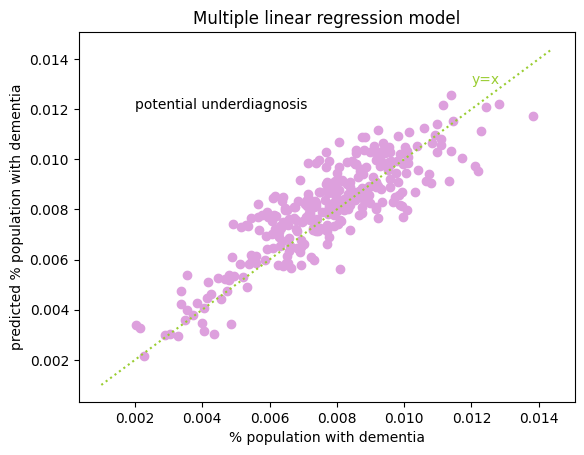

In [22]:
# comparison between true diagnosis value, and the value predicted by the multiple linear regression model 
true_val = df_dem_plus['DEM_afflicted_pc'].values.reshape(-1,1)

plt.plot(np.arange(0.001, 0.0145, 0.0001), np.arange(0.001, 0.0145, 0.0001), ':', color='yellowgreen')
plt.scatter(true_val, y_pred_all, color='plum')
plt.xlabel('% population with dementia')
plt.ylabel('predicted % population with dementia')
plt.title('Multiple linear regression model')
plt.text(0.012, 0.013, r'y=x', fontsize=10, color='yellowgreen')
plt.text(0.002, 0.012, r'potential underdiagnosis', fontsize=10)
plt.show()

In [23]:
# residuals 
all_var_residuals = y_pred_all-true_val

# look at areas with gap between predicted diagnosis rate and observed diagnosis rate 
resid_gap_area = df_dem_plus[all_var_residuals>0.002]['area_name']
[x for x in list(resid_gap_area)]

['Medway',
 'South Hams',
 'Isles of Scilly',
 'Worcester',
 'Swale',
 'Redditch',
 'Wychavon',
 'Tamworth',
 'Swindon',
 "King's Lynn and West Norfolk",
 'Scarborough',
 'Sandwell',
 'South Norfolk',
 'North Lincolnshire',
 'Basildon',
 'Eden',
 'Thanet',
 'Fenland',
 'Plymouth',
 'Nuneaton and Bedworth']

In [24]:
df_IMD[df_IMD['Local Authority District name (2019)'].isin(resid_gap_area)]

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,IMD 2019 - Local concentration,IMD 2019 - Rank of local concentration
12,E06000013,North Lincolnshire,17200.38,120,22.096,115,0.1089,81,0.2043,104,30774.98,87
25,E06000026,Plymouth,19859.59,72,26.619,64,0.1739,50,0.3060,56,31468.47,63
27,E06000030,Swindon,14382.53,171,18.622,157,0.0909,86,0.1566,134,30560.08,93
32,E06000035,Medway,18587.91,98,23.936,93,0.0859,93,0.2389,86,30780.98,86
49,E06000053,Isles of Scilly,10680.00,245,12.005,258,0.0000,195,0.0000,295,10680.00,317
62,E07000010,Fenland,20893.92,51,25.426,80,0.0727,103,0.2146,96,29790.92,115
69,E07000030,Eden,14688.07,169,16.328,186,0.0000,195,0.0046,280,22163.56,262
83,E07000044,South Hams,12057.07,219,13.724,229,0.0000,195,0.0012,289,20908.71,276
92,E07000066,Basildon,17744.60,111,23.243,100,0.1091,80,0.2623,76,30503.62,94
135,E07000113,Swale,19995.99,69,27.076,56,0.1882,45,0.2555,81,32209.61,29


What happens if I include all possible covariates?

In [25]:
# Alternative linear regression using sklearn 

x_all_covar = df_dem_topIMD[['over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc']].values.reshape(-1,7)
y = df_dem_topIMD['DEM_afflicted_pc'].values.reshape(-1,1)

x_test_all_covar = df_dem_plus[['over_65_pc', 'female_pc', 'ALevel_plus_pc', 'white_pc', 'HYP_afflicted_pc', 'DM_afflicted_pc', 'STIA_afflicted_pc']].values.reshape(-1,7)

regr = linear_model.LinearRegression()

# fit regression comorbidities
regr.fit(x_all_covar, y)
y_pred_all = regr.predict(x_test_all_covar)

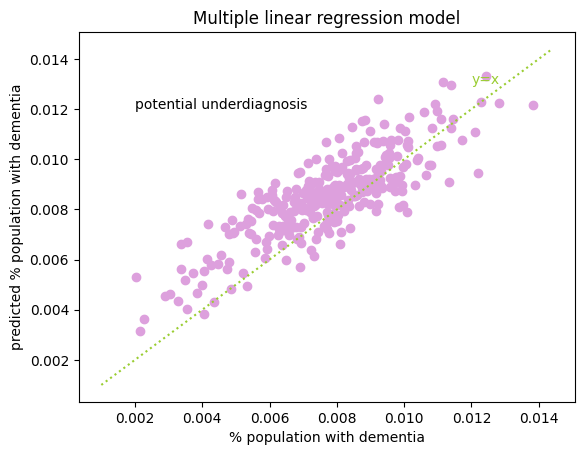

In [26]:
# comparison between true diagnosis value, and the value predicted by the multiple linear regression model 
true_val = df_dem_plus['DEM_afflicted_pc'].values.reshape(-1,1)

plt.plot(np.arange(0.001, 0.0145, 0.0001), np.arange(0.001, 0.0145, 0.0001), ':', color='yellowgreen')
plt.scatter(true_val, y_pred_all, color='plum')
plt.xlabel('% population with dementia')
plt.ylabel('predicted % population with dementia')
plt.title('Multiple linear regression model')
plt.text(0.012, 0.013, r'y=x', fontsize=10, color='yellowgreen')
plt.text(0.002, 0.012, r'potential underdiagnosis', fontsize=10)
plt.show()

In [40]:
# residuals 
all_var_residuals = y_pred_all-true_val

# look at areas with gap between predicted diagnosis rate and observed diagnosis rate 
resid_gap_area = df_dem_plus[all_var_residuals>0.003]['area_name']
[x for x in list(resid_gap_area)]

['Barking and Dagenham',
 'Slough',
 'Redditch',
 'Ealing',
 'Sandwell',
 'Eden',
 'Newham',
 'Torridge']

In [28]:
df_IMD[df_IMD['Local Authority District name (2019)'].isin(resid_gap_area)]

,Local Authority District code (2019),Local Authority District name (2019),IMD - Average rank,IMD - Rank of average rank,IMD - Average score,IMD - Rank of average score,IMD - Proportion of LSOAs in most deprived 10% nationally,IMD - Rank of proportion of LSOAs in most deprived 10% nationally,IMD 2019 - Extent,IMD 2019 - Rank of extent,IMD 2019 - Local concentration,IMD 2019 - Rank of local concentration
1,E06000002,Middlesbrough,23729.10,16,40.460,5,0.4884,1,0.5710,6,32726.13,3
5,E06000006,Halton,21746.16,39,32.325,23,0.3165,13,0.4678,22,32282.99,26
7,E06000008,Blackburn with Darwen,23819.60,14,36.013,9,0.3626,9,0.5519,7,32396.85,18
8,E06000009,Blackpool,26765.29,1,45.039,1,0.4149,6,0.5766,5,32838.16,1
11,E06000012,North East Lincolnshire,20177.27,66,31.335,29,0.3019,17,0.3858,34,32690.91,4
...,...,...,...,...,...,...,...,...,...,...,...,...
308,E09000025,Newham,24138.70,12,29.577,43,0.0244,154,0.2884,67,28987.07,137
309,E09000026,Redbridge,15082.62,160,17.203,173,0.0000,195,0.0405,207,25538.12,207
311,E09000028,Southwark,21247.36,43,25.811,72,0.0301,147,0.2305,91,28758.95,145
313,E09000030,Tower Hamlets,22507.05,27,27.913,50,0.0139,175,0.3057,57,29011.42,134


In [29]:
df_dem_plus['residual'] = all_var_residuals

In [30]:
df_dem_plus_IMD = pd.merge(df_dem_plus, df_IMD[['IMD - Rank of average rank ', 'Local Authority District name (2019)']], left_on='area_name', right_on='Local Authority District name (2019)')

In [32]:
df_dem_plus_IMD.drop(columns='Local Authority District name (2019)', inplace=True)

In [33]:
df_dem_plus_IMD

,area_code,area_name,pop,DEM_afflicted,HYP_afflicted,DM_afflicted,STIA_afflicted,ALevel_plus,Female_all,Male_all,...,white_pc,DEM_afflicted_pc,ALevel_plus_pc,over_65_pc,female_pc,HYP_afflicted_pc,DM_afflicted_pc,STIA_afflicted_pc,residual,IMD - Rank of average rank
0,E07000091,New Forest,151481,1858.546949,28892.139020,9338.695410,4466.648271,72749.0,91513.3596,84729.6073,...,0.932,0.012269,0.480252,0.342754,0.604124,0.190731,0.061649,0.029487,0.000019,241
1,E09000027,Richmond upon Thames,156795,1016.262785,16263.714161,5723.913130,2019.443594,112919.0,101226.6730,93918.3682,...,0.630,0.006481,0.720170,0.201778,0.645599,0.103726,0.036506,0.012880,-0.000483,297
2,E07000116,Tunbridge Wells,95022,876.255260,12908.434533,4606.674451,1889.024705,52395.0,59540.1412,56126.1458,...,0.842,0.009222,0.551399,0.237524,0.626593,0.135847,0.048480,0.019880,-0.001020,273
3,E07000121,Lancaster,123214,1228.376774,16806.421220,6784.714317,2647.583108,65724.0,72615.6480,69496.5141,...,0.878,0.009969,0.533413,0.239143,0.589346,0.136400,0.055064,0.021488,-0.001811,112
4,E07000042,Mid Devon,67987,547.793487,10854.465333,4281.878984,1530.207441,33190.0,42541.3752,40639.6312,...,0.938,0.008057,0.488182,0.294860,0.625728,0.159655,0.062981,0.022507,0.001525,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,E07000098,Hertsmere,82921,670.292640,11021.724346,4685.682668,1328.437922,46875.0,56088.1445,51979.7732,...,0.631,0.008084,0.565297,0.232554,0.676405,0.132918,0.056508,0.016021,0.000093,224
299,E08000024,Sunderland,228781,1815.593270,39805.733965,15607.611455,5391.466952,94211.0,141179.1277,133107.8801,...,0.929,0.007936,0.411796,0.247559,0.617093,0.173991,0.068221,0.023566,0.001592,33
300,E06000050,Cheshire West and Chester,281913,2115.072286,42946.758704,16327.686339,5778.511168,157848.0,182966.3133,174617.3565,...,0.912,0.007503,0.559917,0.270614,0.649017,0.152340,0.057917,0.020497,0.001097,183
301,E07000210,Mole Valley,72165,707.782207,10694.196102,3455.860767,1495.801962,42396.0,44954.5255,42642.7851,...,0.858,0.009808,0.587487,0.289789,0.622941,0.148191,0.047888,0.020728,-0.000732,294


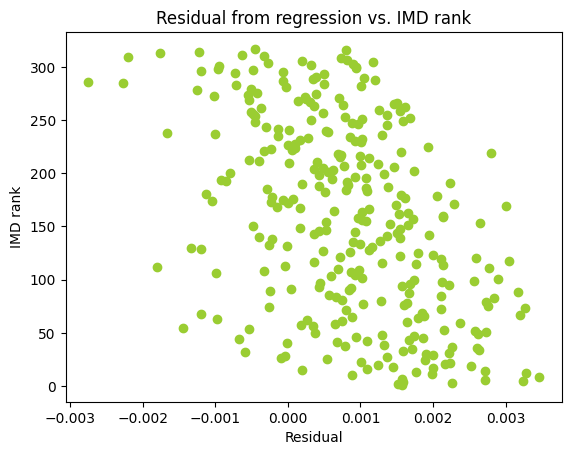

In [38]:
plt.scatter(df_dem_plus_IMD['residual'], df_dem_plus_IMD['IMD - Rank of average rank '], color='yellowgreen')
plt.xlabel('Residual')
plt.ylabel('IMD rank')
plt.title('Residual from regression vs. IMD rank')
plt.show()

In [39]:
len(df_dem_plus)

306